In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/Shareddrives/Dataset Machine Learning/Dataset/Acneset2
!ls


/content/gdrive/Shareddrives/Dataset Machine Learning/Dataset/Acneset2
acnescan.h5  acnescan_v2.h5  my_model.h5  test	train


In [4]:
import os
nodules_dir = os.path.join('train/nodules')
blackhead_dir = os.path.join('train/blackhead')
papula_dir = os.path.join('train/papula')
pustula_dir = os.path.join('train/pustula')
whitehead_dir = os.path.join('train/whitehead')

print('total training Acne nodules images:', len(os.listdir(nodules_dir)))
print('total training blackhead images:', len(os.listdir(blackhead_dir)))
print('total training papula images:', len(os.listdir(papula_dir)))
print('total training pustula images:', len(os.listdir(pustula_dir)))
print('total training whitehead images:', len(os.listdir(whitehead_dir)))

total training Acne nodules images: 71
total training blackhead images: 140
total training papula images: 70
total training pustula images: 139
total training whitehead images: 111


In [5]:
batch_size = 32
img_height = 180
img_width = 180
TRAINING_DIR = "train/"
VALIDATION_DIR = "test/"

In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  TRAINING_DIR,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  VALIDATION_DIR,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 520 files belonging to 5 classes.
Found 267 files belonging to 5 classes.


In [9]:
class_names = train_ds.class_names
print(class_names)


['blackhead', 'nodules', 'papula', 'pustula', 'whitehead']


In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
epochs=100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
17/17 [==============================] - 40s 2s/step - loss: 2.0773 - accuracy: 0.2231 - val_loss: 1.5994 - val_accuracy: 0.2135
Epoch 2/100
17/17 [==============================] - 38s 2s/step - loss: 1.5831 - accuracy: 0.2423 - val_loss: 1.6275 - val_accuracy: 0.2397
Epoch 3/100
17/17 [==============================] - 39s 2s/step - loss: 1.5714 - accuracy: 0.2635 - val_loss: 1.5714 - val_accuracy: 0.2697
Epoch 4/100
17/17 [==============================] - 39s 2s/step - loss: 1.5432 - accuracy: 0.2923 - val_loss: 1.5636 - val_accuracy: 0.2772
Epoch 5/100
17/17 [==============================] - 39s 2s/step - loss: 1.5336 - accuracy: 0.2923 - val_loss: 1.5624 - val_accuracy: 0.2734
Epoch 6/100
17/17 [==============================] - 39s 2s/step - loss: 1.5322 - accuracy: 0.2865 - val_loss: 1.5588 - val_accuracy: 0.2622
Epoch 7/100
17/17 [==============================] - 39s 2s/step - loss: 1.5279 - accuracy: 0.3000 - val_loss: 1.5661 - val_accuracy: 0.2622
Epoch 8/100
1

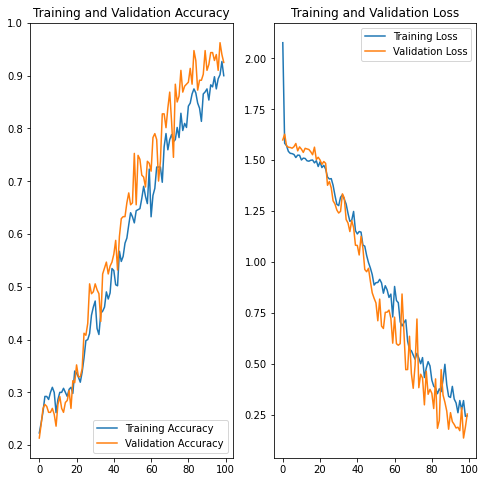

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.

model.save('acnescan_v2.h5')

In [16]:
from keras.models import load_model

# returns a compiled model
# identical to the previous one
new_model= tf.keras.models.load_model(filepath="acnescan_v2.h5")


In [19]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = keras.preprocessing.image.load_img(
      path, target_size=(img_height, img_width)
  )
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  print(
      "This image most likely belongs to {} with a {:.2f} percent confidence."
      .format(class_names[np.argmax(score)], 100 * np.max(score))
  )
 

Saving Blackhead.jpg to Blackhead.jpg
This image most likely belongs to blackhead with a 81.85 percent confidence.


In [18]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(new_model)
tflite_model = converter.convert()

# Save the TF Lite model.
with tf.io.gfile.GFile('acnescan_V2.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp8l9ocdpg/assets
